# 1. Loading and Exploring the Data

In [398]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from model_lib.fixed_c45 import C45Classifier
import numpy as np

## 1.1 Load the Data

In [399]:
# Load the data
data_train = pd.read_csv('DataMining/input/train.csv')
data_test = pd.read_csv('DataMining/input/test.csv')
# Merge the data
data=pd.concat([data_train,data_test],sort=False)
# Display the first 5 rows
data.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


## 1.2 Data Exploration

In [400]:
# Display the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 129880 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         129880 non-null  int64  
 1   id                                 129880 non-null  int64  
 2   Gender                             129880 non-null  object 
 3   Customer Type                      129880 non-null  object 
 4   Age                                129880 non-null  int64  
 5   Type of Travel                     129880 non-null  object 
 6   Class                              129880 non-null  object 
 7   Flight Distance                    129880 non-null  int64  
 8   Inflight wifi service              129880 non-null  int64  
 9   Departure/Arrival time convenient  129880 non-null  int64  
 10  Ease of Online booking             129880 non-null  int64  
 11  Gate location                      129880 non

In [401]:
# Display the data statistics
data.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129880.000000,129487.000000
mean,44158.700000,64940.500000,39.427957,1190.316392,2.728696,3.057599,2.756876,2.976925,3.204774,3.252633,3.441361,3.358077,3.383023,3.350878,3.632114,3.306267,3.642193,3.286326,14.713713,15.091129
std,31207.377062,37493.270818,15.119360,997.452477,1.329340,1.526741,1.401740,1.278520,1.329933,1.350719,1.319289,1.334049,1.287099,1.316252,1.180025,1.266185,1.176669,1.313682,38.071126,38.465650
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,16234.750000,32470.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,38963.500000,64940.500000,40.000000,844.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,71433.250000,97410.250000,51.000000,1744.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


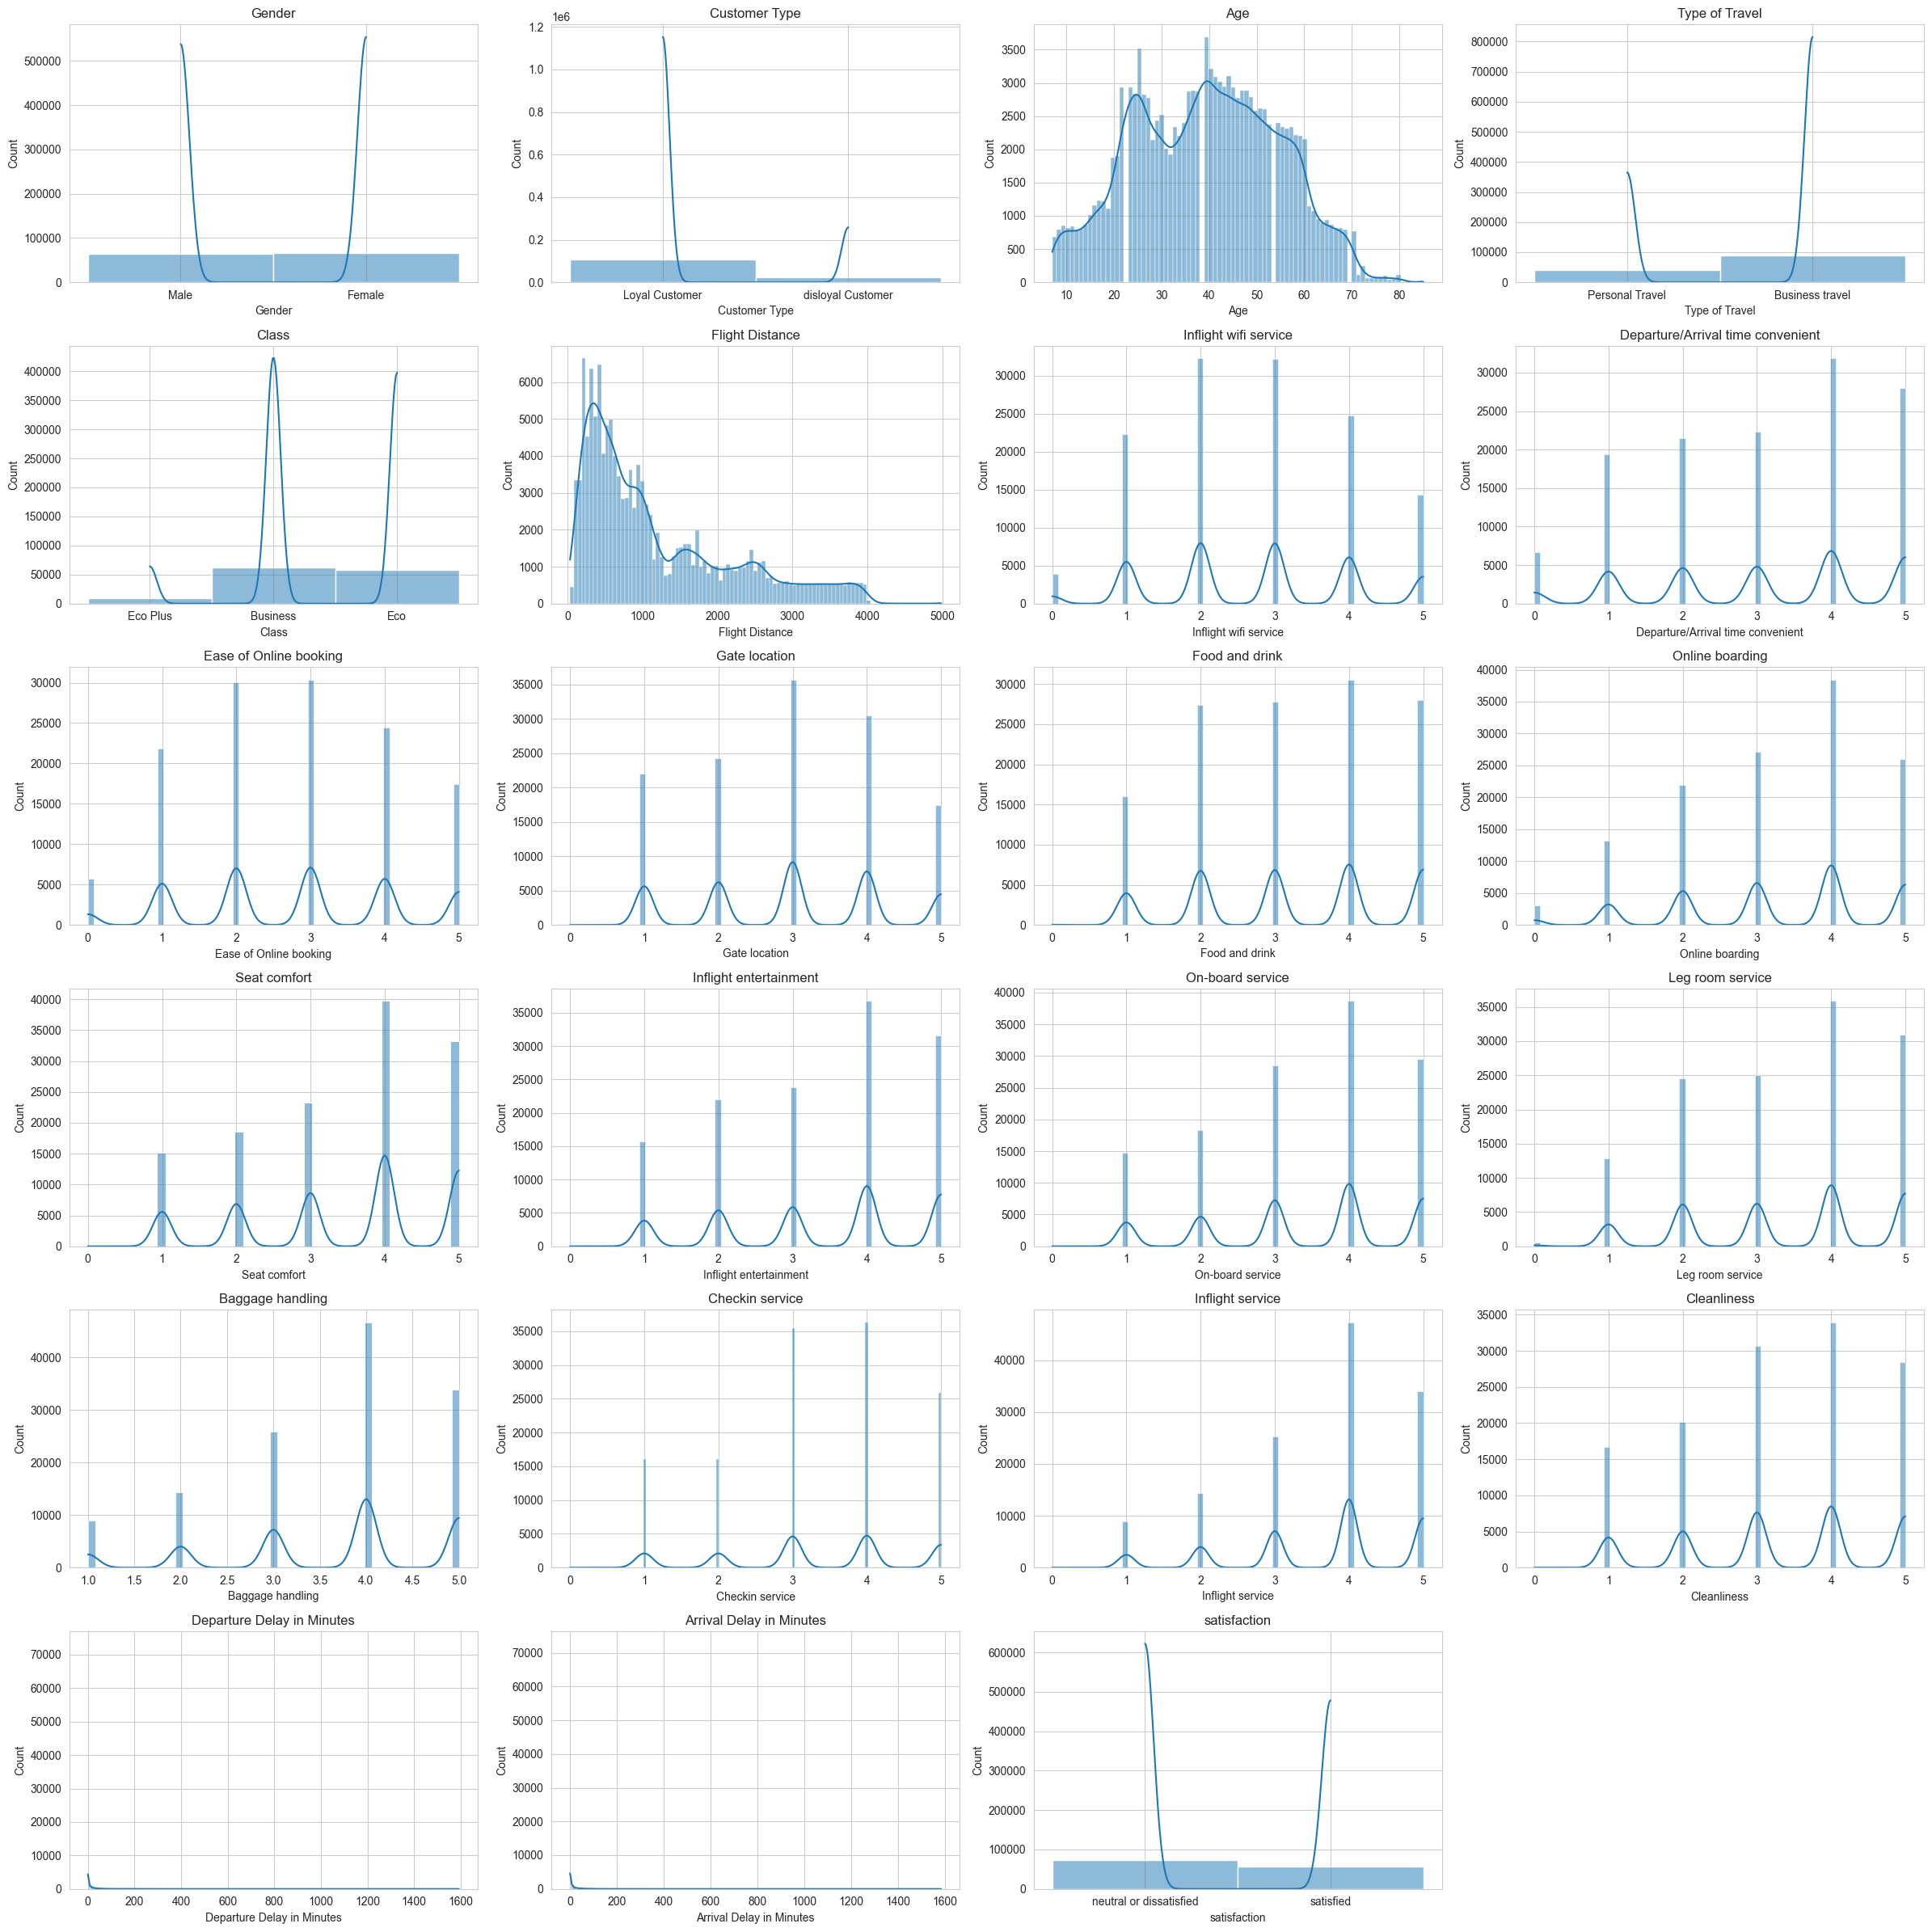

In [402]:
plt.figure(figsize=(24, 24))
for i, column in enumerate(data.drop(['Unnamed: 0','id'],axis=1)):
    plt.subplot(6, 4, i + 1)  # Adjusted to a 6x4 grid to fit 24 subplots
    sns.histplot(data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

# 2. Data Preprocessing

In [403]:
data=data.drop(['Unnamed: 0','id'],axis=1)

In [404]:
numeric_columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes','Arrival Delay in Minutes']

## 2.1 Missing Values

In [405]:
data.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [406]:
# Fill the missing values in the 'Arrival Delay in Minutes' column with the median value
data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_22848\3159495229.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Arrival Delay in Minutes'].fillna(data['Arrival Delay in Minutes'].median(), inplace=True)


### 2.1.1 Transformation Data

In [407]:
# trans log(value) if value > 0 for 'Arrival Delay in Minutes' and 'Departure Delay in Minutes' columns
data['Arrival Delay in Minutes'] = data['Arrival Delay in Minutes'].apply(lambda x: np.log(x) if x > 0 else x)
data['Departure Delay in Minutes'] = data['Departure Delay in Minutes'].apply(lambda x: np.log(x) if x > 0 else x)

## 2.2 Discretization

In [408]:
# Discretize the numeric columns by frequency
discretizer = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')

# Fit and transform the numeric columns
data[numeric_columns] = discretizer.fit_transform(data[numeric_columns])

# Display the first 5 rows to check the discretized data
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Male,Loyal Customer,0.0,Personal Travel,Eco Plus,0.0,3,4,3,1,...,5,4,3,4,4,5,5,2.0,1.0,neutral or dissatisfied
1,Male,disloyal Customer,1.0,Business travel,Business,0.0,3,2,3,3,...,1,1,5,3,1,4,1,0.0,1.0,neutral or dissatisfied
2,Female,Loyal Customer,1.0,Business travel,Business,1.0,2,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,satisfied
3,Female,Loyal Customer,1.0,Business travel,Business,0.0,2,5,5,5,...,2,2,5,3,1,4,2,1.0,1.0,neutral or dissatisfied
4,Male,Loyal Customer,3.0,Business travel,Business,0.0,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,satisfied


In [409]:
print(len(data[data['Arrival Delay in Minutes']>0]))
print(len(data))

46585
129880


In [410]:
# Check for duplicate rows
print('Duplicated rows: ', data.duplicated().sum())

Duplicated rows:  1881


In [411]:
# Drop the duplicate rows
data.drop_duplicates(inplace=True)

## 2.3 Categorical Data

In [412]:
# Display the unique values
data.nunique()

Gender                               2
Customer Type                        2
Age                                  5
Type of Travel                       2
Class                                3
Flight Distance                      5
Inflight wifi service                6
Departure/Arrival time convenient    6
Ease of Online booking               6
Gate location                        6
Food and drink                       6
Online boarding                      6
Seat comfort                         6
Inflight entertainment               6
On-board service                     6
Leg room service                     6
Baggage handling                     5
Checkin service                      6
Inflight service                     6
Cleanliness                          6
Departure Delay in Minutes           5
Arrival Delay in Minutes             5
satisfaction                         2
dtype: int64

## 2.4 Encoding Categorical Data

In [413]:
# Label encoding
label_encoder = LabelEncoder()
header={
    'Gender': ['Male', 'Female'],
    'Customer Type': ['Loyal Customer', 'disloyal Customer'],
    'Type of Travel': ['Personal Travel', 'Business travel'],
    'Class': ['Eco', 'Eco Plus', 'Business'],
    'satisfaction': ['neutral or dissatisfied', 'satisfied']
}
for key in header:
    data[key] = label_encoder.fit_transform(data[key])
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,0.0,1,2,0.0,3,4,3,1,...,5,4,3,4,4,5,5,2.0,1.0,0
1,1,1,1.0,0,0,0.0,3,2,3,3,...,1,1,5,3,1,4,1,0.0,1.0,0
2,0,0,1.0,0,0,1.0,2,2,2,2,...,5,4,3,4,4,4,5,0.0,0.0,1
3,0,0,1.0,0,0,0.0,2,5,5,5,...,2,2,5,3,1,4,2,1.0,1.0,0
4,1,0,3.0,0,0,0.0,3,3,3,3,...,3,3,4,4,3,3,3,0.0,0.0,1


## 2.5 Feature Scaling


In [414]:
# Standardization except the target column
scaler = StandardScaler()
data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])


C:\Users\Admin\AppData\Local\Temp\ipykernel_22848\2642927554.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 1.01564594  1.01564594 -0.98459508 ... -0.98459508  1.01564594
 -0.98459508]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
C:\Users\Admin\AppData\Local\Temp\ipykernel_22848\2642927554.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.47728019  2.09520535 -0.47728019 ... -0.47728019 -0.47728019
 -0.47728019]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.iloc[:, :-1] = scaler.fit_transform(data.iloc[:, :-1])
C:\Users\Admin\AppData\Local\Temp\ipykernel_22848\2642927554.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pa

In [415]:
# Display the first 5 rows to check the scaled data
data.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1.015646,-0.477280,-1.603682,1.479760,2.248730,-0.712203,0.206962,0.616388,0.175849,-1.548019,...,1.239761,0.489336,-0.255844,0.320073,0.553441,1.160340,1.309355,1.551010,0.427632,0
1,1.015646,2.095205,-0.599309,-0.675785,-0.967845,-0.712203,0.206962,-0.692205,0.175849,0.018350,...,-1.755287,-1.839143,1.262258,-0.525661,-1.810752,0.312276,-1.729697,-0.655724,0.427632,0
2,-0.984595,-0.477280,-0.599309,-0.675785,-0.967845,0.318800,-0.545943,-0.692205,-0.537618,-0.764835,...,1.239761,0.489336,-0.255844,0.320073,0.553441,0.312276,1.309355,-0.655724,-0.670391,1
3,-0.984595,-0.477280,-0.599309,-0.675785,-0.967845,-0.712203,-0.545943,1.270685,1.602782,1.584719,...,-1.006525,-1.062983,1.262258,-0.525661,-1.810752,0.312276,-0.969934,0.447643,0.427632,0
4,1.015646,-0.477280,1.409437,-0.675785,-0.967845,-0.712203,0.206962,-0.037909,0.175849,0.018350,...,-0.257763,-0.286824,0.503207,0.320073,-0.234623,-0.535789,-0.210171,-0.655724,-0.670391,1


In [416]:
# duplicate data
data.drop_duplicates(inplace=True)

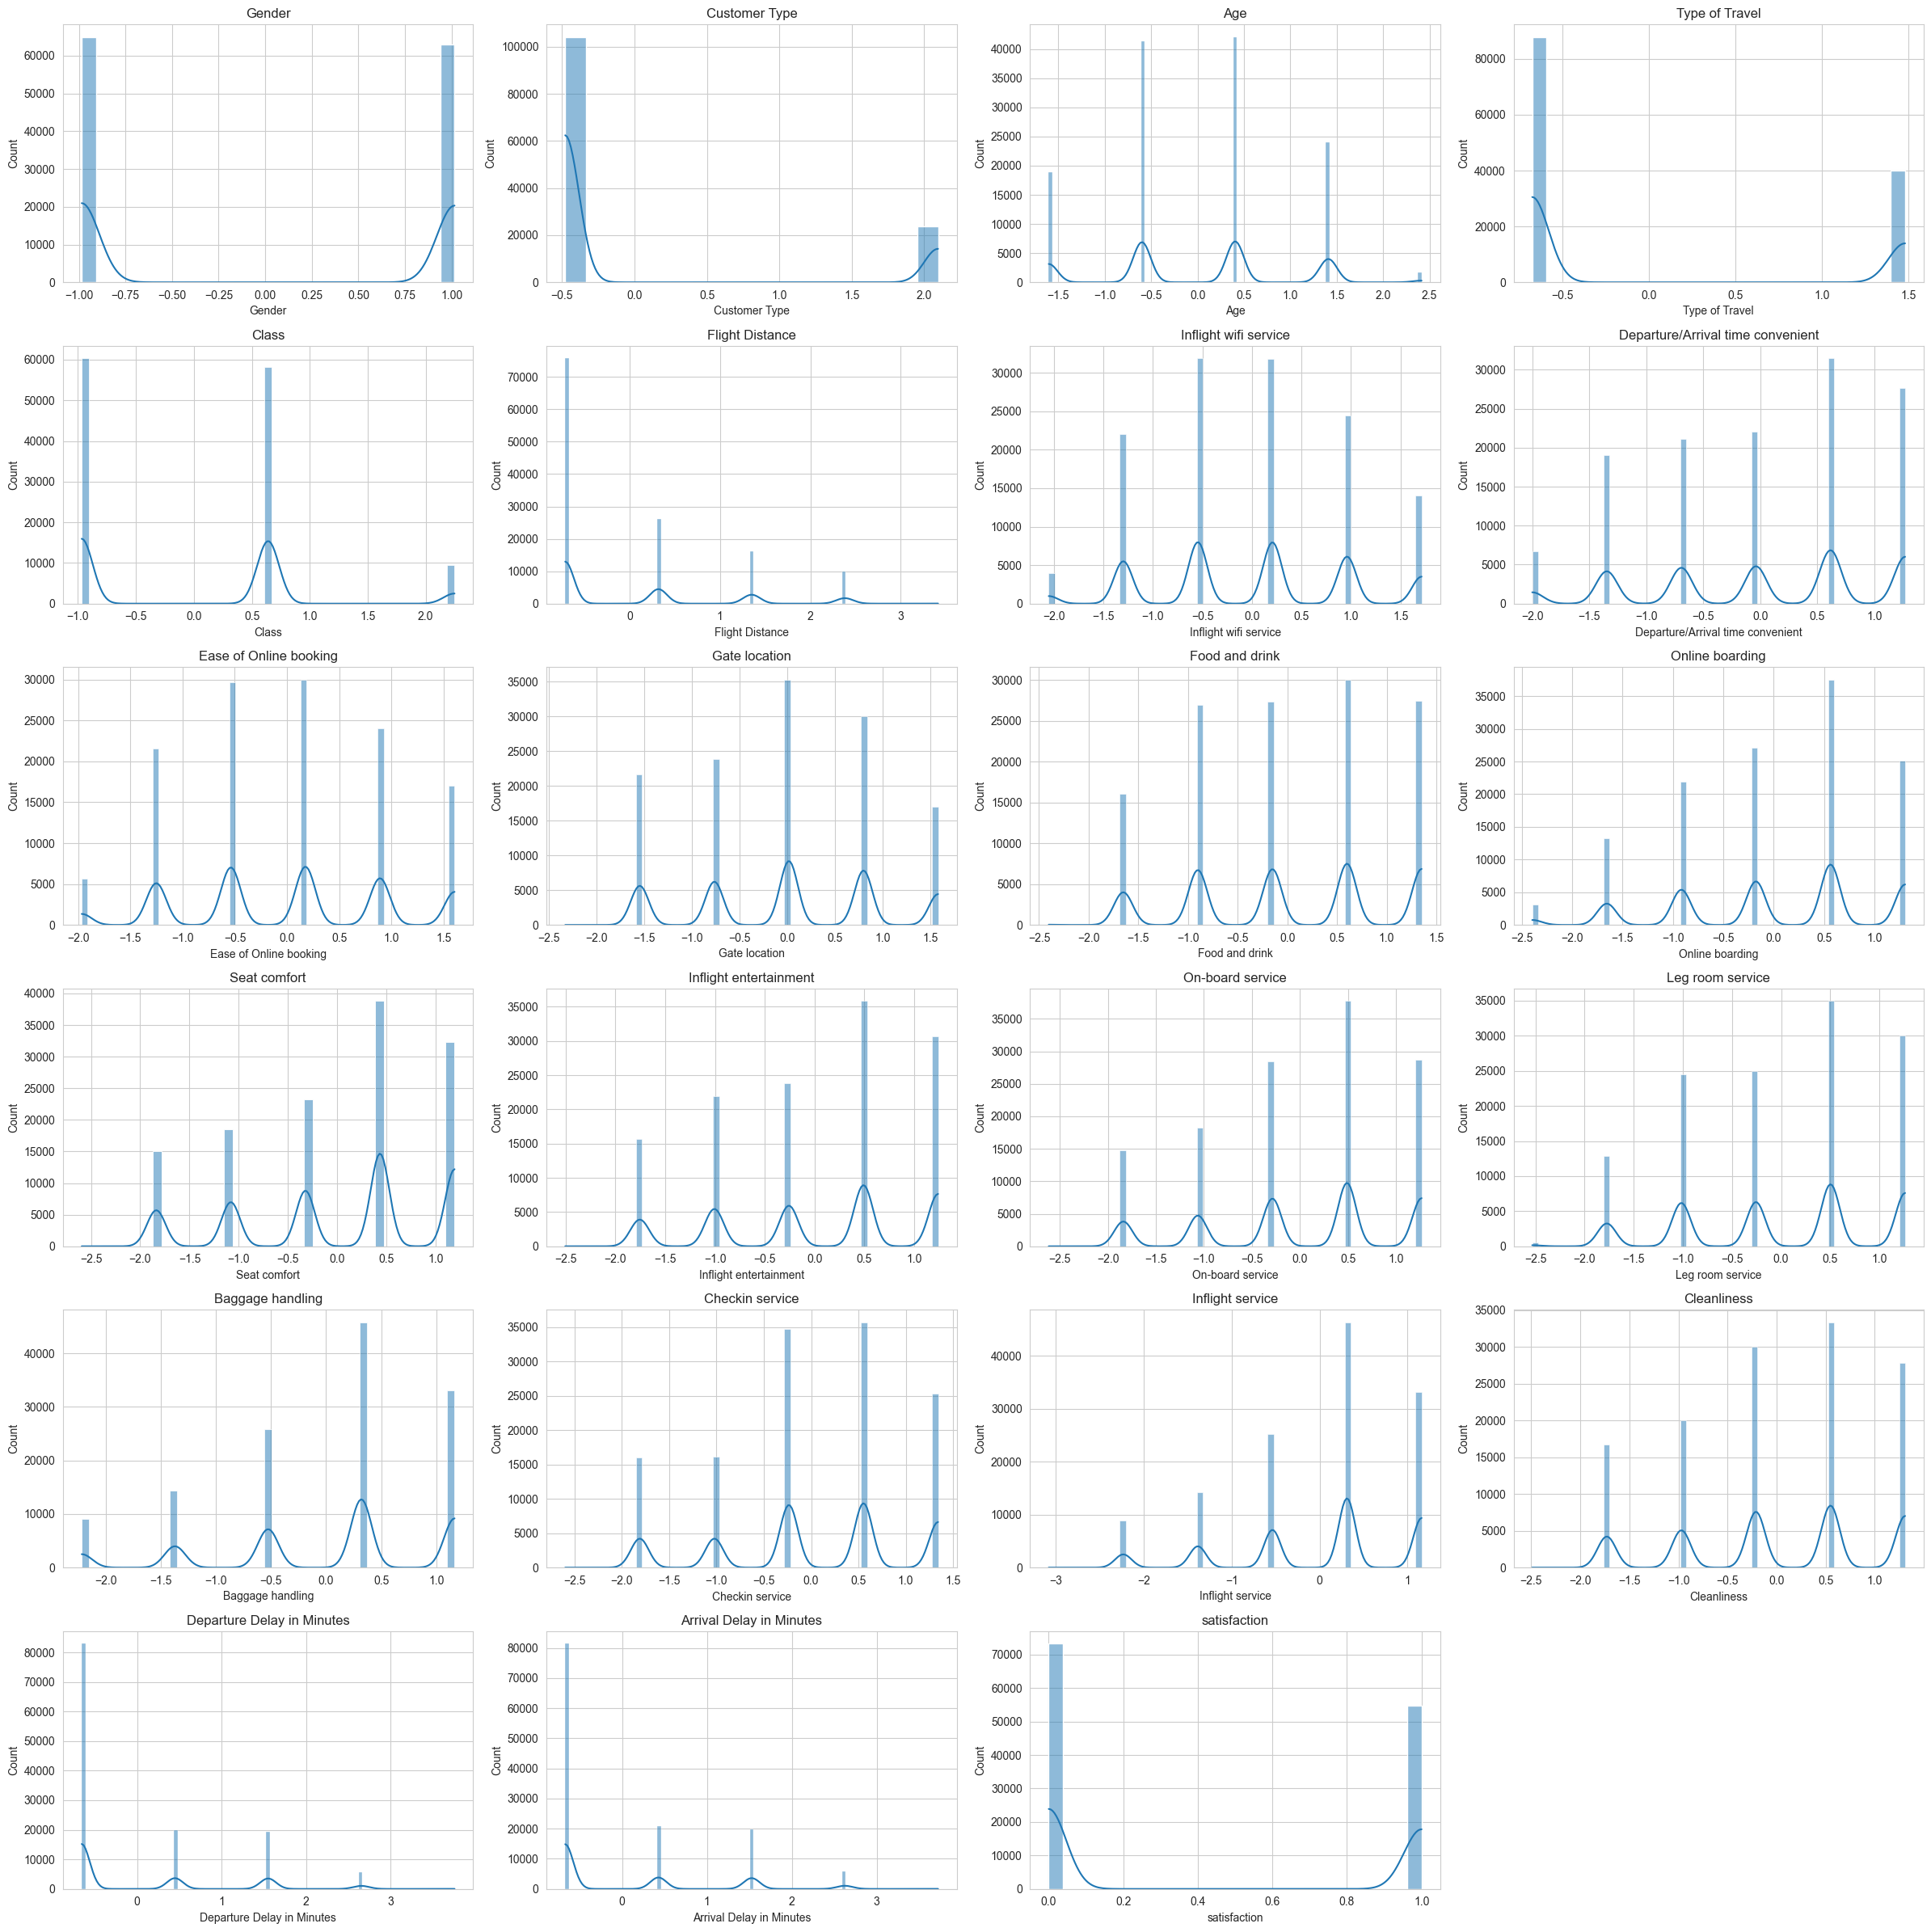

In [417]:
#histogram with sns

plt.figure(figsize=(24, 24))
for i, column in enumerate(data.columns):
    plt.subplot(6, 4, i + 1)  # Adjusted to a 6x4 grid to fit 24 subplots
    sns.histplot(data[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

In [418]:
# Remove the outliers > 3 standard deviations
data = data[(data[numeric_columns] < 3).all(axis=1)]

## 2.6 Correlation Matrix

In [419]:
data.corr()['satisfaction']

Gender                               0.010694
Customer Type                       -0.180820
Age                                  0.136581
Type of Travel                      -0.444944
Class                               -0.440307
Flight Distance                      0.293001
Inflight wifi service                0.284703
Departure/Arrival time convenient   -0.054355
Ease of Online booking               0.168755
Gate location                       -0.003062
Food and drink                       0.209284
Online boarding                      0.495615
Seat comfort                         0.341544
Inflight entertainment               0.391751
On-board service                     0.315132
Leg room service                     0.305026
Baggage handling                     0.241848
Checkin service                      0.232338
Inflight service                     0.238185
Cleanliness                          0.302374
Departure Delay in Minutes          -0.064254
Arrival Delay in Minutes          

# 3. Model Building

In [420]:
# Split the data into X and y
X = data.drop('satisfaction', axis=1)
y = data['satisfaction']

In [421]:
X.head()

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1.015646,-0.477280,-1.603682,1.479760,2.248730,-0.712203,0.206962,0.616388,0.175849,-1.548019,...,1.190040,1.239761,0.489336,-0.255844,0.320073,0.553441,1.160340,1.309355,1.551010,0.427632
1,1.015646,2.095205,-0.599309,-0.675785,-0.967845,-0.712203,0.206962,-0.692205,0.175849,0.018350,...,-1.837155,-1.755287,-1.839143,1.262258,-0.525661,-1.810752,0.312276,-1.729697,-0.655724,0.427632
2,-0.984595,-0.477280,-0.599309,-0.675785,-0.967845,0.318800,-0.545943,-0.692205,-0.537618,-0.764835,...,1.190040,1.239761,0.489336,-0.255844,0.320073,0.553441,0.312276,1.309355,-0.655724,-0.670391
3,-0.984595,-0.477280,-0.599309,-0.675785,-0.967845,-0.712203,-0.545943,1.270685,1.602782,1.584719,...,-1.080357,-1.006525,-1.062983,1.262258,-0.525661,-1.810752,0.312276,-0.969934,0.447643,0.427632
4,1.015646,-0.477280,1.409437,-0.675785,-0.967845,-0.712203,0.206962,-0.037909,0.175849,0.018350,...,1.190040,-0.257763,-0.286824,0.503207,0.320073,-0.234623,-0.535789,-0.210171,-0.655724,-0.670391


In [422]:
# Select the features with the correlation greater than |0.1|
threadhold = 0.15
correlation = data.corr()['satisfaction']
selected_features = correlation[(correlation > threadhold) | (correlation < -threadhold)].index
selected_features = selected_features.drop('satisfaction')
X = X[selected_features]

In [423]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [424]:
# Display the shape of the training and testing sets
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (89366, 16)
X_test shape:  (38300, 16)


In [425]:
c_dt=C45Classifier(max_depth=8)
c_dt.fit(X_train, y_train)

{'Depth of tree: 8'}

In [426]:
# Predict the target
y_pred = c_dt.predict(X_test)
y_pred_train = c_dt.predict(X_train)

In [427]:
#Check overfitting
print('Train score: ', c_dt.score(X_train, y_train))
print('Test score: ', c_dt.score(X_test, y_test))

Train score:  0.9588098381934964
Test score:  0.9477023498694517


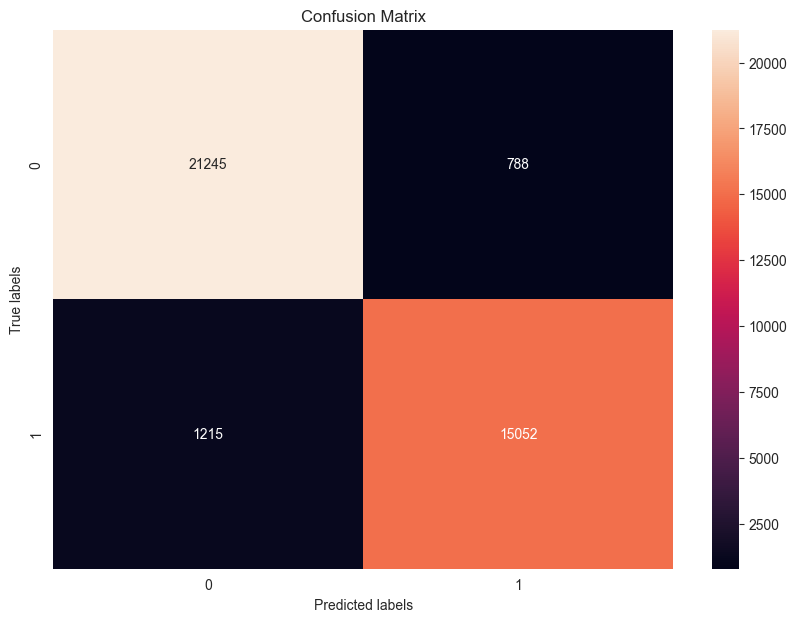

In [428]:
# Display the confusion matrix heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [429]:
# Classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95     22033
           1       0.95      0.93      0.94     16267

    accuracy                           0.95     38300
   macro avg       0.95      0.94      0.95     38300
weighted avg       0.95      0.95      0.95     38300



In [430]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96     51135
           1       0.97      0.94      0.95     38231

    accuracy                           0.96     89366
   macro avg       0.96      0.96      0.96     89366
weighted avg       0.96      0.96      0.96     89366



In [431]:
# Accuracy score
print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.9477023498694517
